##  Use the appended atmospheric energy spectrum (figure 12.9 in the book) to estimate the predictability time scale of the atmosphere.

Submitted by **Ashwin Vishnu Mohanan** (avmo@kth.se)

## Theory

The atmospheric energy spectrum has a structure as denoted in this sketch from Skamarock et al. (2014):

<img src="spectra_canonical.png" width="50%">

In the figure above, we observe that the spectra can be divided into three:

* at **planetary scales** a shallow range is observed which is usually attributed to bottom friction effects,
* at **synoptic scale** $E(k) \sim k^{-3}$ similar to 2D turbulence and
* at **mesoscale** $E(k) \sim k^{-5/3}$ similar to 3D turbulence

At the tail end of the spectra, it steepens again due to dissipation.

## Predictability

As commented in section 11.4.2 in Vallis, the predictibility time scale is determined by the time taken for small perturbations or noise at small scales to grow and and contiminate the large scale. This time scale is typically of the order of the **eddy-turnover time**. Also, there are two different ways to estimate this depending on the route taken by the error growth.

### Error growth via a local cascade

The total time taken for the error to propagate from small scale $k_1$ to large scale $k_0$ is given by:

$$
\begin{aligned}
T 
&= \int_{k_0}^{k_1} \tau_k d(\ln k)\\
&= \int_{k_0}^{k_1} [k^3 E(k)]^{-1/2} d(\ln k) \label{eq:t-general} \\
\end{aligned}
$$

Substituting the known power laws for 2D and 3D turbulence inertial ranges, we get,

$$T_{2d} \sim \eta^{-1/3} \ln(k_1/k_0);\quad T_{3d} \sim \epsilon^{-1/3} k_0^{-2/3}$$ 

The key aspect of such a scaling is that, for 2D turbulence the predictibility time scale can be improved by resolving larger wavenumbers. Conversely, for 3D turbulence the predictibility time scale is limited by the large scale.

### Error growth via direct interaction

In this case small scales directly interacts with large scale without going through the cascade process. In this route time taken for error growth

$$T'_{2d} \sim \eta^{-1/3} \ln(k_1/k_0);\quad T'_{3d} \sim \epsilon^{-1/3} k_0^{-2/3} \ln(k_1/k_0)$$ 

Incidently the expression for $T'_{2d}$ is identical to $T_{2d}$. For 3D turbulence, the time scale estimate is longer by this approach, so the local cascade hypothesis dominates.

### Data analysis

<img src="spectra.png" width="60%">

From the figure above, we can demarcate the spectra into three using the limits:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sy
from sympy.abc import *
from IPython.display import display, Latex
from util import plot, wavenumber, in_days, load, printt


np.set_printoptions(precision=2)

# sy.init_printing(use_latex=True)
# sy.pprint_use_unicode(True)
df = load()

In [2]:
inertial_range_limits = np.array([
    40_000, 3_000, 400, 5
])  # in terms of wavelength (km)

inertial_range_wavenumbers = wavenumber(inertial_range_limits)
print("Wavelengths =", list(inertial_range_limits), "km")
print("Wavenumbers =", inertial_range_wavenumbers, "rad/m")

Wavelengths = [40000, 3000, 400, 5] km
Wavenumbers = [1.57e-07 2.09e-06 1.57e-05 1.26e-03] rad/m


which, when plotted along with data extracted from the figure, we get

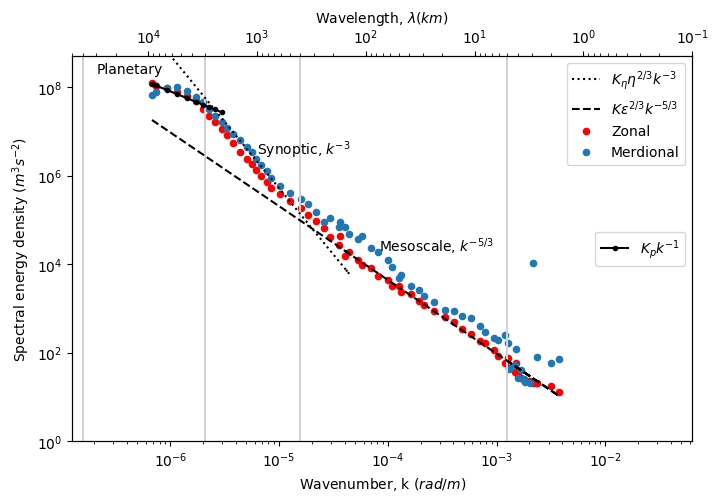

In [5]:
plt.close("all")
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twiny()

df.plot("Zonal_k", "ZonalY", ax=ax, kind="scatter", color="r", label="Zonal")
df.plot("Meridional_k", "MeridionalY", ax=ax, kind="scatter", label="Merdional", loglog=True)

K_eta = 1.3
eta = 0.8e-14

K = 0.51
epsilon = 8e-5

K_large = 80

ax.plot(df.Zonal_k[:30], K_eta*eta**(2/3) * df.Zonal_k[:30]**(-3), "k:", label="$K_\eta \eta^{2/3}k^{-3}$")
ax.plot(df.Zonal_k, K*epsilon**(2/3) * df.Zonal_k**(-5./3), "k--", label="$K \epsilon^{2/3}k^{-5/3}$")
ax2.loglog(df.ZonalX[:10], K_large * wavenumber(df.ZonalX[:10])**(-1), "k.-", label="$K_p k^{-1}$")
ax2.invert_xaxis()
# ax2.loglog(df.Zonal_k, K_large * df.Zonal_k**(-1), "k.-", label="$K_{large} k^{-1}$")

ax.set_ylabel("Spectral energy density ($m^3s^{{-2}}$)")
ax.set_xlabel("Wavenumber, k ($rad/m$)")
ax2.set_xlabel("Wavelength, $\lambda (km)$ ")

xlims = [50_000, 0.1]  # in km
ax.set_xlim(*[wavenumber(x) for x in xlims])
ax2.set_ylim(1, 5e8)
ax2.set_xlim(*xlims)
ax.legend(loc=0)
ax2.legend(loc="center right")

ax2.annotate("Planetary", (30_000, 2e8))
ax2.annotate("Synoptic, $k^{-3}$", (1_000, 3e6))
ax2.annotate("Mesoscale, $k^{-5/3}$", (75, 2e4))

ax.vlines(inertial_range_wavenumbers, ymin=1, ymax=6e8, colors="lightgray")

## Estimates for predictibility time scale

### Time taken for the error to grow across the mesoscale inertial range $T_{3d}$

$T_{3d} \sim \epsilon^{-1/3} k_0^{-2/3}$

In [6]:
def T3d(epsilon, k0):
    t = epsilon**(-1/3) * k_0**(-2/3)
    return t

In [7]:
display(Latex(f"$K = {K} \implies \epsilon = {epsilon}  m^2/s^{{-3}}$"))

<IPython.core.display.Latex object>

Using the wavelength limits (in kilometers):

In [8]:
list(inertial_range_limits[-2:])

[400, 5]

which in terms of wavenumbers are (in $rad/m$) $[k_0, k_1] = $

In [9]:
k_0, k_1 = inertial_range_wavenumbers[-2:]
[float(f"{k:.2g}") for k in (k_0, k_1)]

[1.6e-05, 0.0013]

we get $T_{3d} = $

In [10]:
t3 = T3d(epsilon, k_0)
printt(t3)

3.7e+04 seconds
0.428 day


### Time taken for the error to grow across the synoptic inertial range $T_{2d}$

$T_{2d} = \eta^{-1/3} \ln(k_1/k_0)$

In [11]:
def T2d(eta, k1, k0):
    assert k1 > k0
    t = eta**(-1/3) * np.log(k_1/k_0)
    return t

In [12]:
display(Latex(f"$K_\eta = {K_eta} \implies \eta = {eta}  s^{{-3}}$"))

<IPython.core.display.Latex object>

Using the wavelength limits (in kilometers):

In [13]:
list(inertial_range_limits[1:3])

[3000, 400]

which in terms of wavenumbers are (in $rad/m$) $[k_0, k_1] = $

In [14]:
k_0, k_1 = inertial_range_wavenumbers[1:3]
[float(f"{k:.3g}") for k in (k_0, k_1)]

[2.09e-06, 1.57e-05]

we get $T_{2d} = $

In [15]:
t2 = T2d(eta, k_1, k_0)
printt(t2)

1.01e+05 seconds
1.17 day


### Time taken for the error to grow across the planetary scales $T_p$

For planetary scales, the energy spectrum tends to scale as $E(k) = K_p k^{-1}$ where $K_p$ a constant of proportionality is found to be $80$.

Plugging this into the expression:

$$ T= \int_{k_0}^{k_1} [k^3 E(k)]^{-1/2} d(\ln k)$$

and integrating it, we get the indefinite integral $t_p(k) = $

In [16]:
n = -1
k = sy.Symbol('k', positive=True)
kp = sy.Symbol('K_p', constant=True)
f = (k**3 * (kp * k**n)) ** -0.5
sy.powdenest(sy.integrate(f / k, k).simplify())

-1.0*K_p**(-0.5)*k**(-1.0)

Applying the wavelength limits (in kilometers):

In [17]:
list(inertial_range_limits[:2])

[40000, 3000]

which in terms of wavenumbers are (in $rad/m$):

In [18]:
k_0, k_1 = inertial_range_wavenumbers[:2]
[float(f"{k:.3g}") for k in (k_0, k_1)]

[1.57e-07, 2.09e-06]

Plugging the above limits and $K_p = 80$ into 

$T_{p} = [t_p(k)]_{k_0}^{k_1} = $

In [19]:
k1, k0 = inertial_range_wavenumbers[:2]
tp = float(sy.integrate(f / k, (k, k1, k0)).subs(kp, K_large))
printt(tp)

6.58e+05 seconds
7.62 days


# Total time

The predictability limit can be estimated as:

In [20]:
Latex(rf"$ T_{{3d}} + T_{{2d}} + T_p \approx {in_days(t3 + t2 + tp):.3g}$ days")

<IPython.core.display.Latex object>